# PROYECTO INDIVIDUAL 2 DATA ANALISIS

Rafael Piñera

-------------

Contexto   
  
En Argentina, cada año mueren cerca de 4.000 personas en siniestros viales.   
Aunque muchas jurisdicciones han logrado disminuir la cantidad de accidentes de tránsito,   
esta sigue siendo la principal causa de muertes violentas en el país.   
  
  
Los informes del Sistema Nacional de Información Criminal (SNIC), del Ministerio de Seguridad de la Nación,     
revelan que entre 2018 y 2022 se registraron 19.630 muertes en siniestros viales en todo el país.   
Estas cifras equivalen a 11 personas por día que resultaron víctimas fatales por accidentes de tránsito.    

Solo en 2022, se contabilizaron 3.828 muertes fatales en este tipo de hechos. Los expertos en la materia indican que,  
en Argentina es dos o tres veces más alta la probabilidad de que una persona muera en un siniestro vial que en un hecho de inseguridad delictiva.

-------------------

¡No debes mostrar nada de código en la exposición! Te recomendamos el workshop From Data to Viz para que te quede más claro la dinámica y lo que se espera de tu demo.

---------------

DATOS RELEVANTES

M de Prevención:   
a. educación vial  
b. normas de tránsito   
c. infraestructura  
d. vehículos seguros  


Impacta sobre:    
a. seguridad en general  
b. turismo/visitantes  
c. servicios de emergencia  

TASA#1: nro_de_muertes_en_siniestros * nro_de_habitantes

TASA#2: nro_de_muertes * vehículos_registrados

-----------

# Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires  
# Observatorio de Movilidad y Seguridad Vial (OMSV)  

Proyecto de anális de datos,   
OBJETO: generar información, DECIDIR MEDIDAS   
*disminuir la cantidad de víctimas fatales de los siniestros viales*



RECURSOS   
#dataset - homicidios - siniestros viales - en CABA ((2016-2021)).  
"""dataset - formato xlsx - dos hojas llamadas: hechos y víctimas"""  
#dos hojas de diccionarios de guía  
#material de apoyo  

----------------------

## Modelado de datos

In [2]:
#Contamos con el DataSet correspondiente a: 
""" Homicidios en Siniestros viales [CABA]"""
# y 
"""Lesiones en Siniestros Viales [CABA]"""

'Lesiones en Siniestros Viales [CABA]'

Al abrir el archivo xlsx correspondiente a los homicidios,     
en libre-office- una inspección visual nos permite determinar:  
que tiene una tabla denominada HECHOS.  
que tiene las columnas:  
ID  
N_VICTIMAS  
FECHA  
AAAA  
MM  
DD  
HORA  
HH  
LUGAR_DEL_HECHO  
TIPO_DE_CALLE  
Calle  
Altura  
Cruce  
Dirección Normalizada  
COMUNA  
XY (CABA)  
pos x  
pos y  
PARTICIPANTES  
ACUSADO   
VICTIMA  
  
y otra TABLA denominada VÍCTIMAS  
que tiene las columnas:  
ID_hecho  
FECHA  
AAAA  
MM  
DD
ROL  
VICTIMA  
SEXO  
EDAD  
FECHA_FALLECIMIENTO  
  
en función de esto, y para manipular toda la información en un solo CSV, con python/pandas.  
voy a cambiar el nombre de la tabla hechos a HECHOS_FATALES   
voy a cambiar el nombre de ID de la tabla HECHOS_FATALES a ID_HECHOS_FATALES  
  
voy a cambiar el nombre ROL a ROL_VICTIMA  
voy a cambiar el nombre SEXO a SEXO_VICTIMA  
voy a cambiar el nombre EDAD a EDAD_VICTIMA  
voy a cambiar el nombre ID_hecho de la tabla VICTIMAS a ID_HECHOS_FATALES  
  
--voy a eliminar columnas que considero que no son necesarias--  
Primero elimino las columnas de las fechas de la tabla víctimas  
FECHA  
AAAA  
MM  
DD  
y la columna   
VICTIMA  
  
después elimino las columnas   
MM  
DD  
de la tabla HECHOS_FATALES  
  
ahora voy a anidar las dos tablas [HECHOS_FATALES y  VICTIMAS ](hacer un "merge") teniendo como clave de referencia los valores de las columna ID_HECHOS_FATALES de las correspondientes tablas.   
Así se va a conformar el CSV : HECHOS_FATALES.csv



In [3]:
"""Cambiar el nombre de la tabla y de la columna en la tabla "HECHOS":"""

import pandas as pd
import os

# Cargar el archivo xlsx
homicidios_df = pd.read_excel('DataSets/1-homicidios.xlsx', sheet_name='HECHOS')

# Cambiar el nombre de la tabla
homicidios_df = homicidios_df.rename(columns={'ID': 'ID_HECHOS_FATALES'})

# Guardar el DataFrame resultante en un CSV temporal
homicidios_df.to_csv('HECHOS_FATALES_temp.csv', index=False)

""""Cambiar el nombre de las columnas en la tabla "VÍCTIMAS":"""

# Cargar el archivo xlsx
victimas_df = pd.read_excel('DataSets/1-homicidios.xlsx', sheet_name='VICTIMAS')

# Cambiar el nombre de las columnas
victimas_df = victimas_df.rename(columns={'ROL': 'ROL_VICTIMA',
                                           'SEXO': 'SEXO_VICTIMA',
                                           'EDAD': 'EDAD_VICTIMA',
                                           'ID_hecho': 'ID_HECHOS_FATALES'})

# Eliminar columnas innecesarias
victimas_df = victimas_df.drop(columns=['FECHA', 'AAAA', 'MM', 'DD', 'VICTIMA'])

# Guardar el DataFrame resultante en un CSV temporal
victimas_df.to_csv('VICTIMAS_temp.csv', index=False)

#Eliminar las columnas de fechas de la tabla "HECHOS":
homicidios_df = homicidios_df.drop(columns=['MM', 'DD'])

#Anidar las dos tablas (hacer un merge):
# Combinar los DataFrames utilizando la columna 'ID_HECHOS_FATALES' como clave
merged_df = pd.merge(homicidios_df, victimas_df, on='ID_HECHOS_FATALES')

# Guardar el DataFrame combinado en el archivo CSV final
merged_df.to_csv('DataSets/3-HECHOS_FATALES.csv', index=False)

os.remove('HECHOS_FATALES_temp.csv')


In [4]:
import pandas as pd

# Importar el archivo CSV como un DataFrame
hechos_fatales_df = pd.read_csv('DataSets/3-HECHOS_FATALES.csv')


# Mostrar las primeras filas del DataFrame para verificar que se importó correctamente
hechos_fatales_df.head()


,ID_HECHOS_FATALES,N_VICTIMAS,FECHA,AAAA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


In [5]:
# Eliminar las columnas 'HH' y 'FECHA_FALLECIMIENTO'
hechos_fatales_df = hechos_fatales_df.drop(columns=['HH', 'FECHA_FALLECIMIENTO'])

# Mostrar las primeras filas del DataFrame actualizado
hechos_fatales_df.tail()

,ID_HECHOS_FATALES,N_VICTIMAS,FECHA,AAAA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA
712,2021-0093,1,2021-12-13,2021,17:10:00,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,...,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18
713,2021-0094,1,2021-12-20,2021,01:10:00,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,...,9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43
714,2021-0095,1,2021-12-30,2021,00:43:00,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,...,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27
715,2021-0096,1,2021-12-15,2021,10:30:00,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,...,9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60
716,2021-0097,1,2021-11-18,2021,06:10:00,PADRE CARLOS MUJICA 709,CALLE,PADRE CARLOS MUJICA,709.0,NaN,...,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO,CICLISTA,MASCULINO,53


In [6]:
hechos_fatales_df.shape

(717, 21)

VERIFICAMOS LOS DATOS FALTANTES

In [7]:
import numpy as np

# Reemplazar 'SD', 'sd' y 'Sd' por NaN en el DataFrame
hechos_fatales_df.replace({'SD': np.nan, 'sd': np.nan, 'Sd': np.nan}, inplace=True)

# Contar la cantidad de NaN por columna
nan_por_columna = hechos_fatales_df.isna().sum()

# Mostrar la cantidad de NaN por columna
print(nan_por_columna)


ID_HECHOS_FATALES          0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
HORA                       1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    9
ACUSADO                   23
ROL_VICTIMA               11
SEXO_VICTIMA               6
EDAD_VICTIMA              53
dtype: int64


In [8]:
# Guardar el DataFrame combinado en el archivo CSV final
merged_df.dropna(subset=['AAAA'], inplace=True)
# Eliminar filas con valores nulos en la columna 'TIPO_DE_CALLE'
merged_df.dropna(subset=['TIPO_DE_CALLE'], inplace=True)

# Eliminar filas con valor cero en la columna 'TIPO_DE_CALLE'
merged_df = merged_df[merged_df['TIPO_DE_CALLE'] != 0]

merged_df.to_csv('DataSets/3-HECHOS_FATALES.csv', index=False)

-------------------------------

In [9]:
import pandas as pd
import numpy as np

# Cargar el archivo Excel
hechos_lesiones_df = pd.read_excel('DataSets/2-lesiones.xlsx', sheet_name='HECHOS')
# Reemplazar los valores 'SD', 'sd', 'Sd', 'sD' con NaN
hechos_lesiones_df.replace({'SD': np.nan, 'sd': np.nan, 'Sd': np.nan, 'sD': np.nan}, inplace=True)

# Renombrar las columnas
hechos_lesiones_df.rename(columns={
    'id': 'ID_HECHOS_LESIONES',
    'n_victimas': 'N_VICTIMAS',
    'aaaa': 'AAAA',
    'fecha': 'FECHA',
    'franja_hora': 'HORA'
}, inplace=True)

# Eliminar columnas innecesarias
hechos_lesiones_df.drop(columns=['hora', 'mm', 'dd', 'direccion_normalizada', 'altura'], inplace=True)

# Guardar como archivo CSV
hechos_lesiones_df.to_csv('DataSets/4-HECHOS_LESIONES.csv', index=False)


In [10]:
hechos_lesiones_df

,ID_HECHOS_LESIONES,N_VICTIMAS,AAAA,FECHA,HORA,comuna,tipo_calle,otra_direccion,calle,cruce,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,2019-01-01 00:00:00,9.0,14,NaN,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",NaN,NaN,...,-34.559658,CICLISTA,NaN,CICLISTA-SD,NaN,NaN,NaN,NaN,x,NaN
1,LC-2019-0000053,1,2019,2019-01-01 00:00:00,1.0,8,NaN,"Autopista Presidente Héctor J. Cámpora y Roca,...",NaN,NaN,...,-34.669125,AUTO,NaN,AUTO-SD,NaN,x,NaN,NaN,NaN,NaN
2,LC-2019-0000063,1,2019,2019-01-01 00:00:00,2.0,8,NaN,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",NaN,NaN,...,-34.677556,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
3,LC-2019-0000079,1,2019,2019-01-01 00:00:00,2.0,7,NaN,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",NaN,NaN,...,-34.647349,PEATON,NaN,PEATON-SD,x,NaN,NaN,NaN,NaN,NaN
4,LC-2019-0000082,4,2019,2019-01-01 00:00:00,4.0,3,NaN,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",NaN,NaN,...,-34.604579,AUTO,NaN,AUTO-SD,NaN,NaN,x,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,2021-12-31 00:00:00,19.0,9,AVENIDA,NaN,"ALBERDI, JUAN BAUTISTA AV.",GUAMINI,...,-34.659713573880,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
23781,LC-2021-0652865,2,2021,2021-12-31 00:00:00,19.0,9,AVENIDA,NaN,"ALBERDI, JUAN BAUTISTA AV.",NaN,...,-34.641753304864,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
23782,LC-2021-0652907,1,2021,2021-12-31 00:00:00,20.0,1,NaN,Barrio Padre Carlos Mugica (Villa 31 bis),NaN,NaN,...,-34.583083,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
23783,LC-2021-0652921,1,2021,2021-12-31 00:00:00,22.0,5,CALLE,NaN,LINIERS VIRREY,MORENO,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [11]:
hechos_lesiones_df.shape

(23785, 22)

In [12]:
import pandas as pd
# Mostrar la cantidad de NaN por columna
print(hechos_lesiones_df.isna().sum())


ID_HECHOS_LESIONES          0
N_VICTIMAS                  0
AAAA                        0
FECHA                       0
HORA                        9
comuna                   1015
tipo_calle              11045
otra_direccion          18295
calle                   10918
cruce                   14378
geocodificacion_CABA     1252
longitud                 1471
latutid                  1471
victima                 10733
acusado                 15288
participantes               0
moto                     8604
auto                    12636
transporte_publico      11894
camion                  12801
ciclista                11446
gravedad                23139
dtype: int64


In [13]:
#voy a borrar las columnas calle, altura, cruce, otra_direccion ya que tienen muchisimos valores faltantes.
hechos_lesiones_df.drop(columns=['calle', 'cruce', 'otra_direccion'], inplace=True)



In [14]:
hechos_lesiones_df

,ID_HECHOS_LESIONES,N_VICTIMAS,AAAA,FECHA,HORA,comuna,tipo_calle,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,2019-01-01 00:00:00,9.0,14,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,NaN,CICLISTA-SD,NaN,NaN,NaN,NaN,x,NaN
1,LC-2019-0000053,1,2019,2019-01-01 00:00:00,1.0,8,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,NaN,AUTO-SD,NaN,x,NaN,NaN,NaN,NaN
2,LC-2019-0000063,1,2019,2019-01-01 00:00:00,2.0,8,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
3,LC-2019-0000079,1,2019,2019-01-01 00:00:00,2.0,7,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,NaN,PEATON-SD,x,NaN,NaN,NaN,NaN,NaN
4,LC-2019-0000082,4,2019,2019-01-01 00:00:00,4.0,3,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,NaN,AUTO-SD,NaN,NaN,x,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,2021-12-31 00:00:00,19.0,9,AVENIDA,Point (95400.5441905024 96621.6007711877),-58.513477158887,-34.659713573880,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
23781,LC-2021-0652865,2,2021,2021-12-31 00:00:00,19.0,9,AVENIDA,Point (97705.4491469278 98614.8825470092),-58.488326609395,-34.641753304864,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
23782,LC-2021-0652907,1,2021,2021-12-31 00:00:00,20.0,1,NaN,Point (107377.10694920316745993 105120.7873965...,-58.382894,-34.583083,NaN,NaN,SD-SD,NaN,NaN,NaN,NaN,NaN,NaN
23783,LC-2021-0652921,1,2021,2021-12-31 00:00:00,22.0,5,CALLE,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [15]:
import numpy as np

# Crear una nueva columna 'participantes2'
hechos_lesiones_df['participantes2'] = hechos_lesiones_df.apply(lambda row: [
    col for col in ['camion', 'ciclista', 'transporte_publico', 'auto', 'moto']
    if not pd.isna(row[col])
], axis=1)

# Reemplazar las listas vacías con NaN
hechos_lesiones_df['participantes2'] = hechos_lesiones_df['participantes2'].apply(lambda x: np.nan if len(x) == 0 else x)
# Eliminar las columnas 'camion', 'ciclista', 'transporte_publico', 'auto', 'moto'
hechos_lesiones_df.drop(columns=['camion', 'ciclista', 'transporte_publico', 'auto', 'moto'], inplace=True)



verifico que en realidad la columna participantes2 no va a ser de utilidad

In [16]:
# Eliminar la columna 'participantes2'
hechos_lesiones_df.drop(columns=['participantes2'], inplace=True)


In [17]:
# Filtrar el DataFrame para mantener solo las filas donde 'gravedad' no sea NaN
hechos_lesiones_df = hechos_lesiones_df.dropna(subset=['gravedad'])


In [18]:
hechos_lesiones_df.tail()

,ID_HECHOS_LESIONES,N_VICTIMAS,AAAA,FECHA,HORA,comuna,tipo_calle,geocodificacion_CABA,longitud,latutid,victima,acusado,participantes,gravedad
23690,LC-2021-0643816,2,2021,2021-12-27 00:00:00,9.0,4,AVENIDA,Point (105942.990941468 99141.7934928861),-58.398483407494,-34.636989320248,NaN,NaN,SD-SD,GRAVE
23714,LC-2021-0646672,1,2021,2021-12-28 00:00:00,11.0,4,AVENIDA,Point (107839.851132956 100002.314189332),-58.377803456359,-34.629219619904,NaN,NaN,SD-SD,GRAVE
23724,LC-2021-0648408,2,2021,2021-12-29 00:00:00,9.0,4,AVENIDA,Point (106665.463236739 98731.1206797588),-58.390600653960,-34.640686871798,NaN,NaN,SD-SD,GRAVE
23740,LC-2021-0649774,1,2021,2021-12-29 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,PEATON,MOTO,PEATON-MOTO,GRAVE
23783,LC-2021-0652921,1,2021,2021-12-31 00:00:00,22.0,5,CALLE,Point (104472.702045632 101660.930364258),-58.414532050899,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,GRAVE


In [19]:
# Guardar como archivo CSV
hechos_lesiones_df.to_csv('DataSets/4-HECHOS_LESIONES.csv', index=False)

----------------------

## ANALISIS

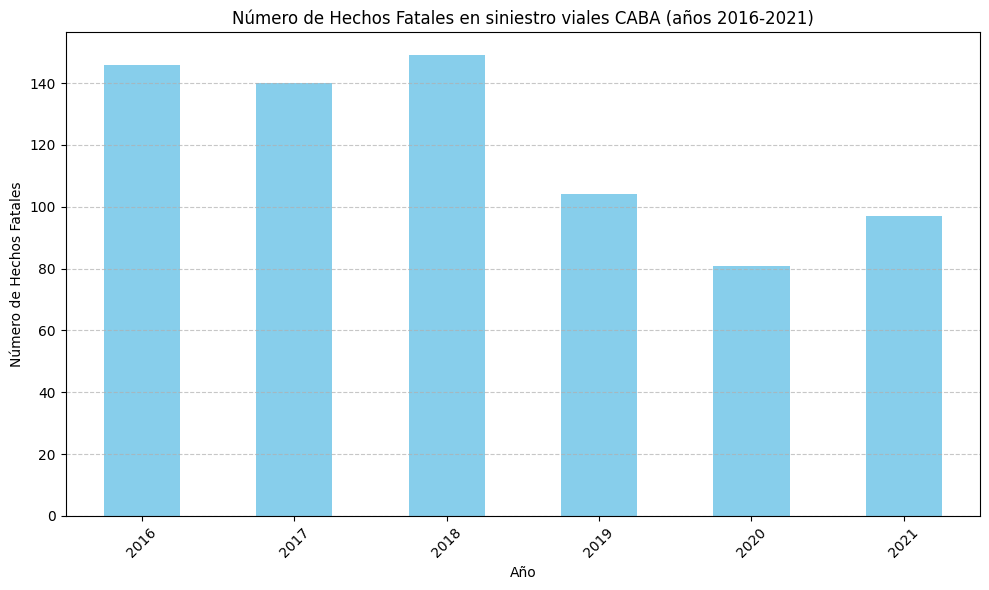

In [20]:
import matplotlib.pyplot as plt

# Contar el número de hechos por cada año
hechos_por_anio = hechos_fatales_df['AAAA'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
hechos_por_anio.plot(kind='bar', color='skyblue')
plt.title('Número de Hechos Fatales en siniestro viales CABA (años 2016-2021)')
plt.xlabel('Año')
plt.ylabel('Número de Hechos Fatales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Este gráfico nos permite observar que en los años 2018, 2016 y 2017 hubo más accidentes viales con desenlaces fatales.  
Se observa que en los 3 últimos añosse redujo la cantidad de siniestros fatales.  


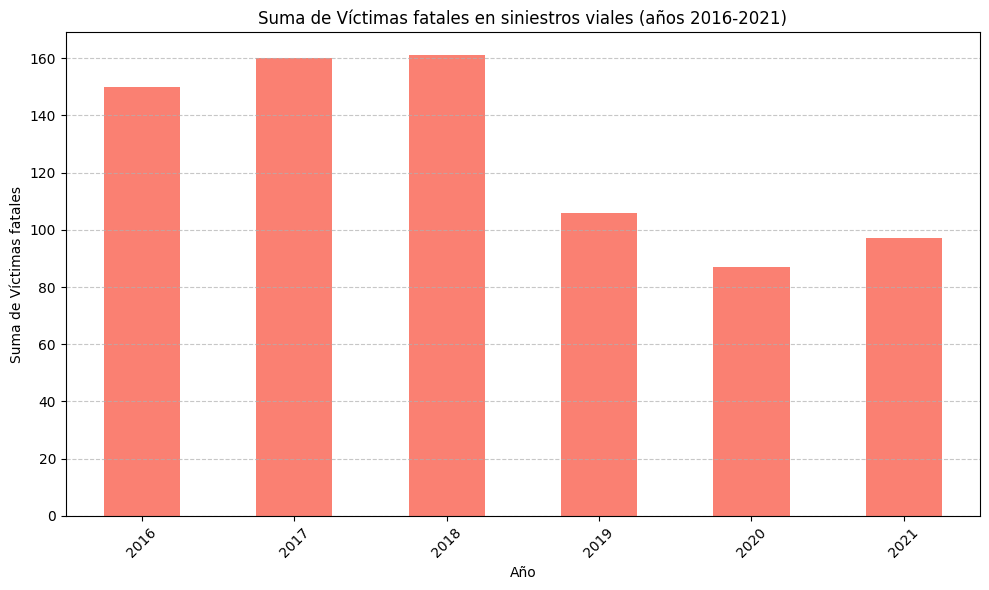

In [21]:
# Calcular la suma de las victimas por cada año
victimas_por_anio = hechos_fatales_df.groupby('AAAA')['N_VICTIMAS'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
victimas_por_anio.plot(kind='bar', color='salmon')
plt.title('Suma de Víctimas fatales en siniestros viales (años 2016-2021)')
plt.xlabel('Año')
plt.ylabel('Suma de Víctimas fatales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En este gráfico se ve las víctimas de los desenlaces fatales, además se aprecia que en los 3 últimos años  
se redujo la cantidad tanto de víctimas fatales.  


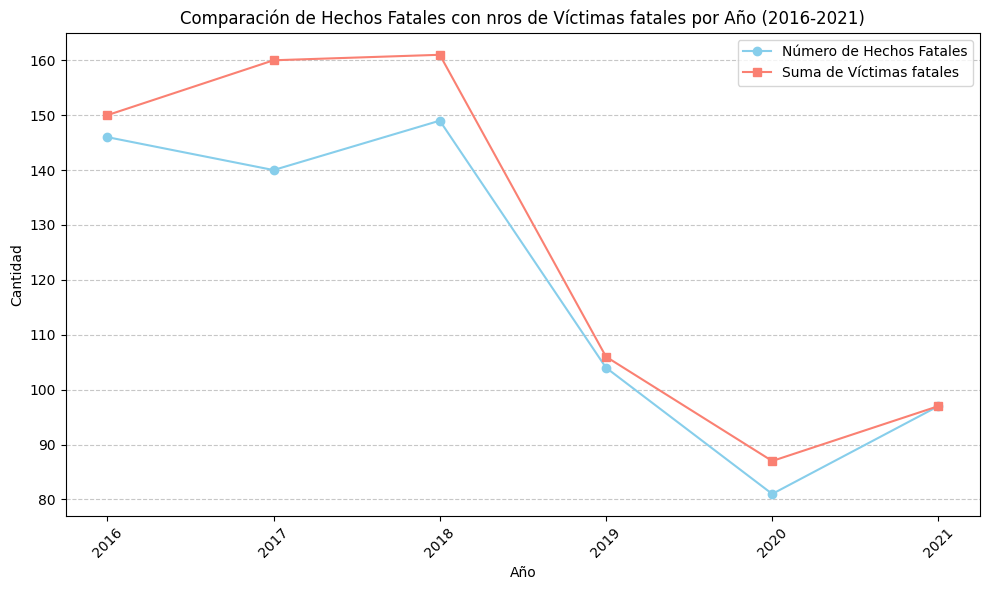

In [22]:
# Calcular el número de hechos fatales por cada año
hechos_por_anio = hechos_fatales_df['AAAA'].value_counts().sort_index()

# Calcular la suma de las víctimas por cada año
victimas_por_anio = hechos_fatales_df.groupby('AAAA')['N_VICTIMAS'].sum()

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
hechos_por_anio.plot(kind='line', marker='o', color='skyblue', label='Número de Hechos Fatales')
victimas_por_anio.plot(kind='line', marker='s', color='salmon', label='Suma de Víctimas fatales')
plt.title('Comparación de Hechos Fatales con nros de Víctimas fatales por Año (2016-2021)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


En este gráfico se comparan los datos de los gráficos de barras expuestos previamente, pero expresados en relaciones lineales.

In [23]:
import pandas as pd

# Reemplazar valores no válidos por NaN
hechos_fatales_df['HORA'] = pd.to_datetime(hechos_fatales_df['HORA'], format='%H:%M:%S', errors='coerce')

# Reemplazar NaN con el valor predeterminado
hechos_fatales_df['HORA'].fillna(pd.to_datetime('00:00:00', format='%H:%M:%S'), inplace=True)

#errors='coerce' is a way to handle conversion errors by replacing them with NaN values,    
#allowing the conversion process to continue without being interrupted by errors.



In [24]:
import pandas as pd

# Convertir la columna "HORA" a formato de tiempo especificando el formato
hechos_fatales_df['HORA'] = pd.to_datetime(hechos_fatales_df['HORA'], format='%H:%M:%S')

# Calcular la moda de la columna "AAAA"
moda_AAAA = hechos_fatales_df['AAAA'].mode().iloc[0]

# Calcular la moda de la columna "HORA"
moda_HORA = hechos_fatales_df['HORA'].dt.hour.mode().iloc[0]

# Calcular la moda de la columna "COMUNA"
moda_COMUNA = hechos_fatales_df['COMUNA'].mode().iloc[0]

# Mostrar los resultados
print("Moda de la columna AAAA:", moda_AAAA)
print("Moda de la columna HORA:", moda_HORA)
print("Moda de la columna COMUNA:", moda_COMUNA)



Moda de la columna AAAA: 2018
Moda de la columna HORA: 6
Moda de la columna COMUNA: 1


 -----------------TOTAL DE LOS DATOS HOMICIDIOS---------------------    
   
A partir de calcular la moda de las columnas correspondientes se puede mencionar que en CABA, en siniestro viales:

-EL AÑO EN EL QUE MAS ACCIDENTES FATALES HUBO FUE EN 2018

-El horario de mayor accidentes fatales 06:00 am

-La COMUNA 1 donde más siniestros viales con víctimas fatales hubo.
  
  
(mapa donde se muestra la ubicación de cada comuna y los nombres de los barrios)  

![Texto alternativo](mapacaba.png)

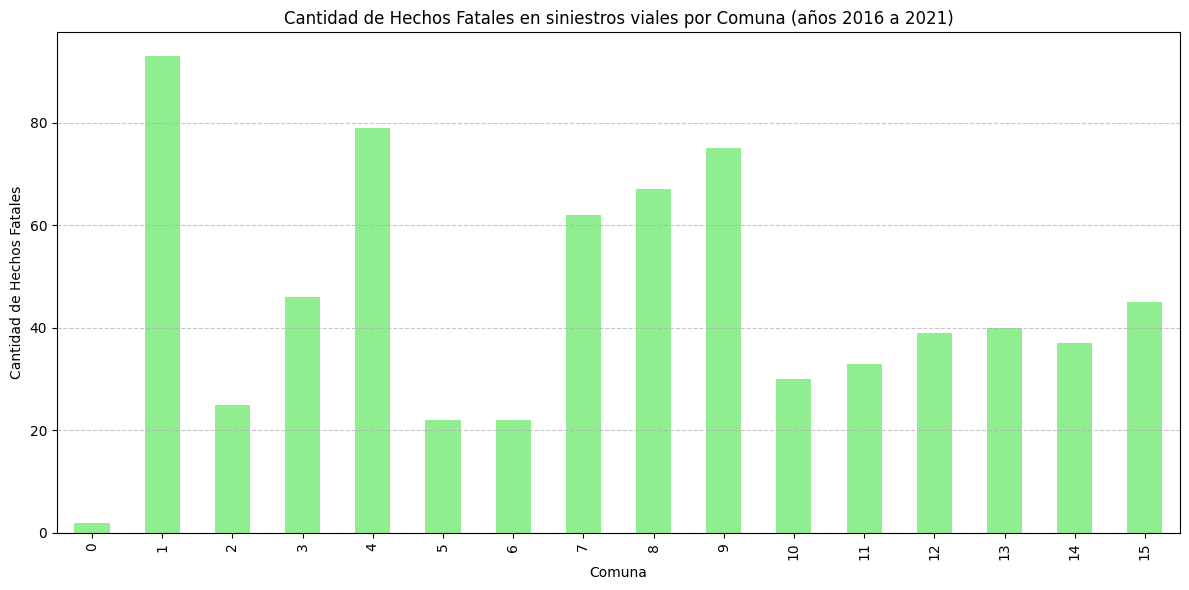

In [25]:
# Calcular el número de hechos fatales por comuna
hechos_por_comuna = hechos_fatales_df['COMUNA'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
hechos_por_comuna.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Hechos Fatales en siniestros viales por Comuna (años 2016 a 2021)')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Hechos Fatales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En el gráfico se observa la cantidad de siniestros viales fatales por comuna

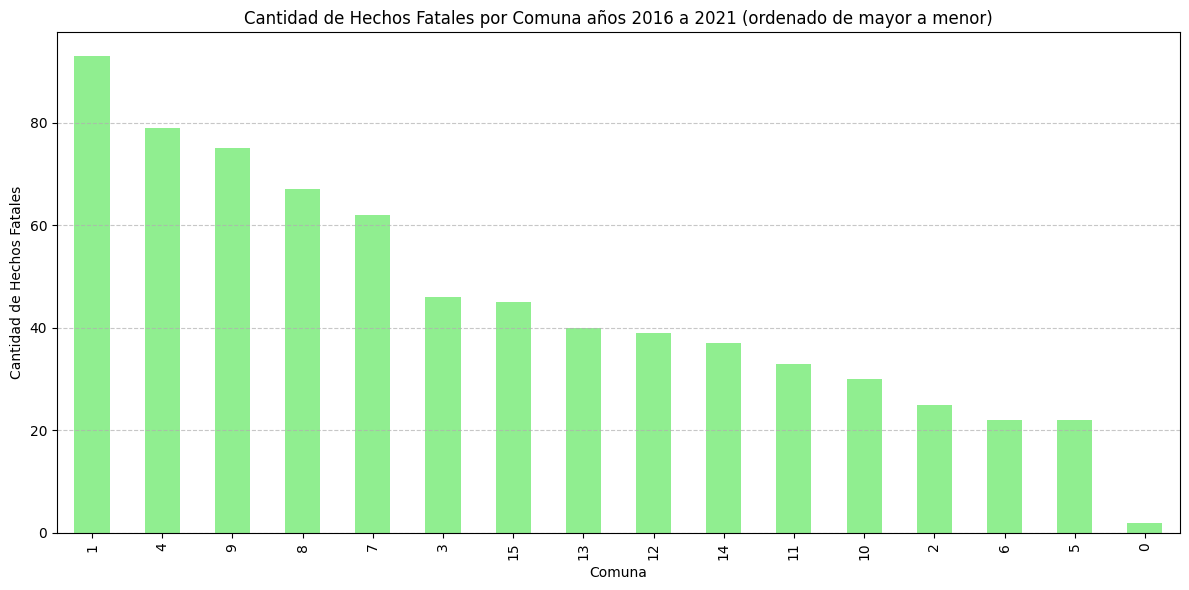

In [26]:
# Calcular el número de hechos fatales por comuna y ordenar de mayor a menor
hechos_por_comuna = hechos_fatales_df['COMUNA'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
hechos_por_comuna.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Hechos Fatales por Comuna años 2016 a 2021 (ordenado de mayor a menor)')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Hechos Fatales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


![Texto alternativo](mapabarrios.png)

A partir de este gráfico y el mapa, vemos cuales son las comunas que en el período analizado tuvieron mayor cantidad de     
siniestros viales con desenlaces fatales.   
Se encuentran subrayados los 5 barrios con los valores más altos.    
La mayoría de los barrios coinciden con la zona sur/sudoeste, lindante con la PBA.  

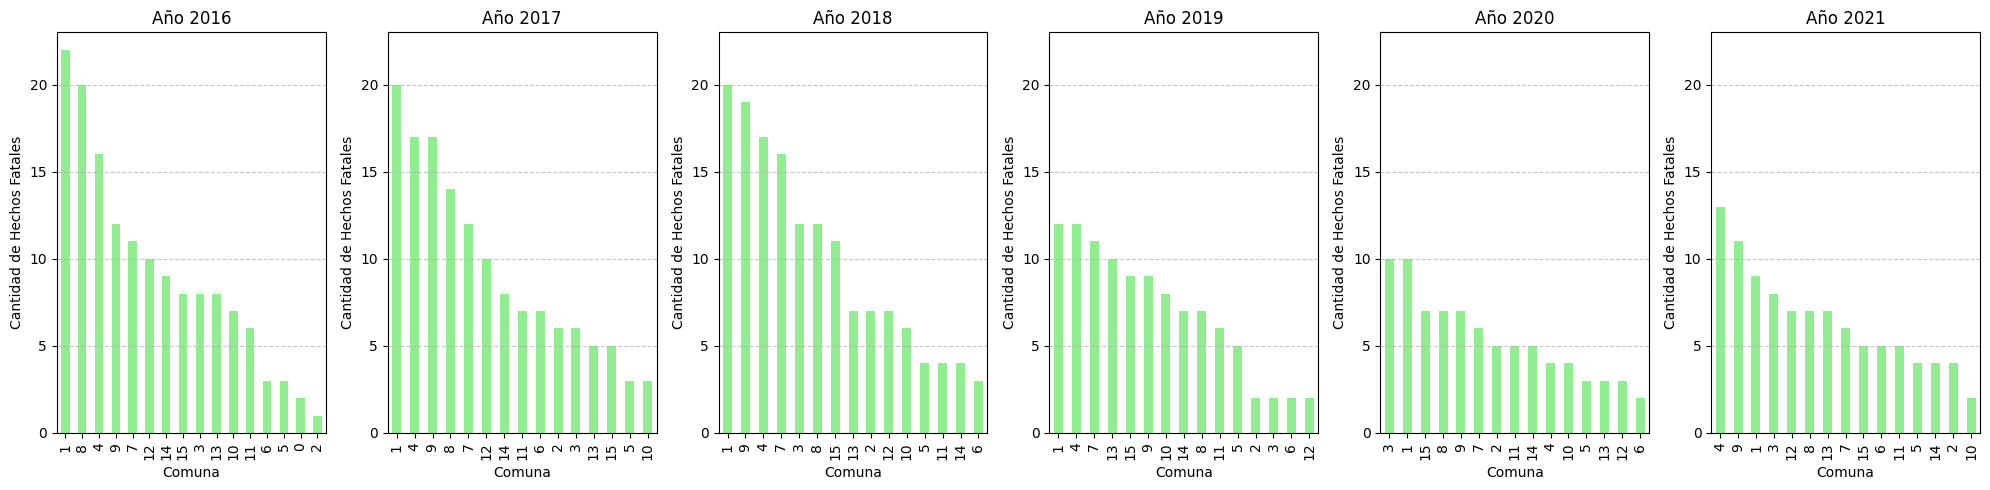

In [27]:
# Crear una figura y ejes para cada uno de los años
fig, axs = plt.subplots(1, 6, figsize=(20, 5))

# Calcular y graficar para cada año
for i, ax in enumerate(axs.flatten(), start=2016):
    # Filtrar los datos por año
    hechos_por_comuna = hechos_fatales_df[hechos_fatales_df['AAAA'] == i]['COMUNA'].value_counts().sort_values(ascending=False)
    
    # Crear el gráfico de barras
    hechos_por_comuna.plot(kind='bar', color='lightgreen', ax=ax)
    ax.set_title(f'Año {i}')
    ax.set_xlabel('Comuna')
    ax.set_ylabel('Cantidad de Hechos Fatales')
    ax.set_xticklabels(hechos_por_comuna.index, rotation=90)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Establecer límites en el eje y
    ax.set_ylim(0, 23)  # Ajusta los límites según tus necesidades

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()



In [28]:
from IPython.display import display, HTML

# Obtener el código HTML para mostrar las imágenes en una fila
html_code = """
<div style="display: flex;">
    <img src="f1.png" style="margin-right: 100px;">
    <img src="f2.png" style="margin-right: 100px;">
    <img src="f3.png" style="margin-right: 100px;">
    <img src="f4.png" style="margin-right: 100px;">
    <img src="f5.png" style="margin-right: 100px;">
    <img src="f6.png">
</div>
"""

# Mostrar el código HTML en el notebook
display(HTML(html_code))


A partir de los gráficos y los mapas podemos tomar una mejor dimensión de las comunas mas calientes en términos de accidentes fatales a lo largo de los años.  
Se destacan la comuna 1, 4 y 9  
De las más seguras en este sentido son la 5, la 6, la 2  

Por otro lado también podemos apreciar en los gráficos que se achicó la distancia entre la cantidad de victimas fatales de las comunas con mayores de estas, y menores.

In [29]:
# Calcular la cantidad de hechos fatales por comuna para cada año
hechos_por_comuna_por_anio = hechos_fatales_df.groupby(['AAAA', 'COMUNA']).size().unstack(fill_value=0)

# Calcular la cantidad total de hechos fatales por comuna en el primer y último año
hechos_primer_anio = hechos_por_comuna_por_anio.iloc[0]
hechos_ultimo_anio = hechos_por_comuna_por_anio.iloc[-1]

# Calcular la diferencia en la cantidad de hechos fatales entre el primer y último año para cada comuna
diferencia_hechos = hechos_ultimo_anio - hechos_primer_anio

# Encontrar la comuna con la mayor reducción en la cantidad de hechos fatales
comuna_max_reduccion = diferencia_hechos.idxmin()
reduccion_maxima = diferencia_hechos.min()

print(f"Del 2016 al 2021 La comuna que más redujo la cantidad de hechos fatales fue la nro. {comuna_max_reduccion} con una reducción de {reduccion_maxima} hechos fatales.")


Del 2016 al 2021 La comuna que más redujo la cantidad de hechos fatales fue la nro. 1 con una reducción de -13 hechos fatales.


Sin embargo la comuna 1 fue la única que se mantuvo constante entre las primeras 3 con mas accidentes fatales.

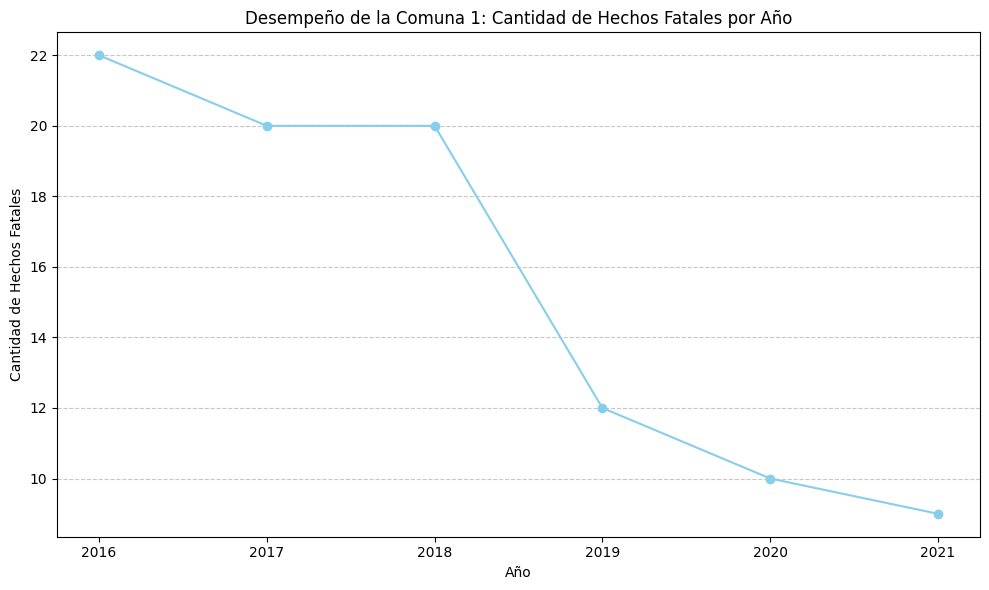

In [30]:
# Filtrar los datos para la comuna 1
hechos_comuna_1 = hechos_por_comuna_por_anio[1]

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
hechos_comuna_1.plot(kind='line', marker='o', color='skyblue')
plt.title('Desempeño de la Comuna 1: Cantidad de Hechos Fatales por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Hechos Fatales')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Gráfico en el que se puede observar el desempeño de la comuna 1

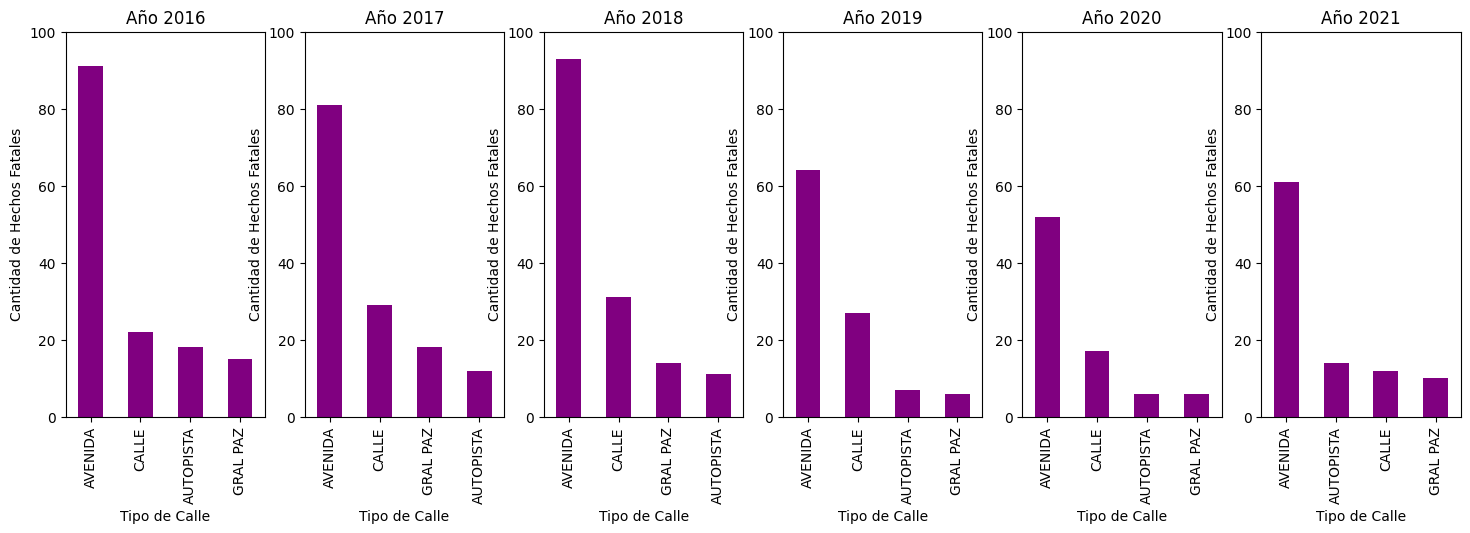

In [31]:
# Obtener los años únicos en los datos
años_unicos = hechos_fatales_df['AAAA'].unique()

# Calcular el máximo valor de hechos fatales para todos los años y tipos de calle
max_hechos_fatales = hechos_fatales_df['TIPO_DE_CALLE'].value_counts().max()

# Crear una figura y ejes para cada año
fig, axs = plt.subplots(1, len(años_unicos), figsize=(18, 5))

# Calcular y graficar para cada año
for i, año in enumerate(años_unicos):
    # Filtrar los datos por año
    datos_año = hechos_fatales_df[hechos_fatales_df['AAAA'] == año]
    
    # Calcular la cantidad de hechos fatales por tipo de calle
    hechos_por_tipo_de_calle = datos_año['TIPO_DE_CALLE'].value_counts()
    
    # Crear el gráfico de barras
    hechos_por_tipo_de_calle.plot(kind='bar', color='purple', ax=axs[i])
    axs[i].set_title(f'Año {año}')
    axs[i].set_xlabel('Tipo de Calle')
    axs[i].set_ylabel('Cantidad de Hechos Fatales')
    axs[i].set_ylim(0, 100)  # Esta



A partir de este gráfico se concluye que la mayor cantidad de siniestros viales con desenlace fatal se producen en AVENIDAS.  
llegando a ser **casi el doble que el resto de los valores**. Incluso mas del triple en 2021  

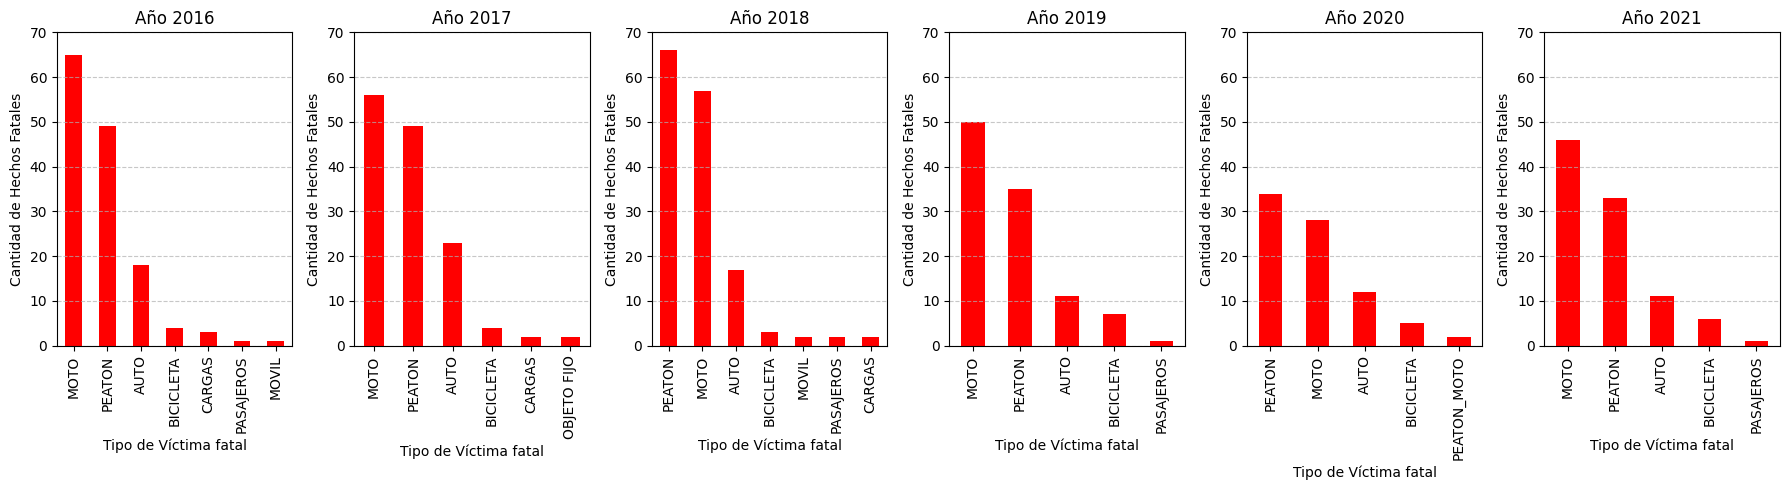

In [32]:
# Obtener los años únicos en los datos
años_unicos = hechos_fatales_df['AAAA'].unique()

# Calcular el máximo valor de hechos fatales para todos los años y tipos de víctimas
max_hechos_fatales = hechos_fatales_df['VICTIMA'].value_counts().max()

# Crear una figura y ejes para cada año
fig, axs = plt.subplots(1, len(años_unicos), figsize=(18, 5))

# Calcular y graficar para cada año
for i, año in enumerate(años_unicos):
    # Filtrar los datos por año
    datos_año = hechos_fatales_df[hechos_fatales_df['AAAA'] == año]
    
    # Calcular la cantidad de hechos fatales por tipo de víctima
    hechos_por_tipo_de_victima = datos_año['VICTIMA'].value_counts()
    
    # Crear el gráfico de barras con color violeta
    hechos_por_tipo_de_victima.plot(kind='bar', color='red', ax=axs[i])
    axs[i].set_title(f'Año {año}')
    axs[i].set_xlabel('Tipo de Víctima fatal')
    axs[i].set_ylabel('Cantidad de Hechos Fatales')
    axs[i].set_ylim(0, 70)  # Establecer límites en el eje y
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()


El peatón y principalmente la moto, encabezan las víctimas fatales en la ciudad.

En comparación con 2016 en el año 2020 hubo una reducción de casi la mitad de víctimas fatales en moto.  
En el 2020 tampoco hubo víctimas fatales de pasajeros.  
Esto muy posiblemente debido a las restricciones de circulación impuestas a partir del COVID-19  

In [33]:
# Contar el número total de registros en el DataFrame original
total_registros = len(hechos_fatales_df)
# Contar el número de filas en el DataFrame original
total_registros = len(hechos_fatales_df)

# Contar el número de filas después de eliminar valores no válidos en la columna pos x
registros_visualizados = len(hechos_fatales_df[hechos_fatales_df['pos x'].notna()])

# Calcular el número de registros que se lograron visualizar en el mapa
registros_visualizados_en_mapa = total_registros - (total_registros - registros_visualizados)

print("filas/columnas:",hechos_fatales_df.shape)
print("Registros visualizados en el mapa:", registros_visualizados_en_mapa)
print("Total de registros en el DataFrame original:", total_registros)

filas/columnas: (717, 21)
Registros visualizados en el mapa: 717
Total de registros en el DataFrame original: 717


In [34]:
import geopandas as gpd

# Cargar el archivo CSV con los límites de los barrios
barrios_csv_path = 'barrios.csv'  # Ruta al archivo CSV
barrios_gdf = gpd.read_file(barrios_csv_path)

# Guardar el GeoDataFrame como un archivo GeoJSON
barrios_geojson_path = 'barrios.geojson'  # Ruta para guardar el archivo GeoJSON
barrios_gdf.to_file(barrios_geojson_path, driver='GeoJSON')

print("El archivo GeoJSON ha sido creado correctamente:", barrios_geojson_path)

El archivo GeoJSON ha sido creado correctamente: barrios.geojson


In [44]:
import folium

# Eliminar filas con valores no válidos en la columna pos x
hechos_fatales_df = hechos_fatales_df[hechos_fatales_df['pos x'] != '.']

# Convertir los valores de las columnas pos x y pos y a tipo float
hechos_fatales_df['pos x'] = hechos_fatales_df['pos x'].astype(float)
hechos_fatales_df['pos y'] = hechos_fatales_df['pos y'].astype(float)

# Crear un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[-34.603722, -58.381592], zoom_start=12)

# Cargar los límites de los barrios desde el archivo GeoJSON
barrios_geojson_path = 'barrios.geojson'
folium.GeoJson(barrios_geojson_path, name='Barrios').add_to(mapa)

# Agregar marcadores para cada ubicación en el DataFrame
for _, row in hechos_fatales_df.iterrows():
    folium.Marker([row['pos y'], row['pos x']]).add_to(mapa)

# Agregar control de capas al mapa
folium.LayerControl().add_to(mapa)

merged_df.to_csv('DataSets/6-Mapa.csv', index=False)

# Mostrar el mapa
mapa




EN EL MAPA INTERACTIVO SE LOGRA OBSERVAR QUE LAS AVENIDAS Y LA GENERAL PAZ
SON LAS RUTAS CON MAYOR  FOCO DE ACCIDENTES MORTALES.

TAMBIÉN QUE LOS BARRIOS DE COLEGIALES, COGHLAN, VILLA PUEYRREDÓN, PARQUE CHAS, NUÑEZ, SAAVEDRA, MATADEROS, MONTE CASTRO; SON BARRIOS CON POCA CANTIDAD DE ACCIDENTES, CONCENTRANDOSE ESTOS CASI EXCLUSIVAMENTE EN LAS AVENIDAS.

In [37]:
with open('folium_map.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

# Create a DataFrame with the HTML content
data = {'HTML': [html_content]}
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('html_data.csv', sep='|', index=False)

In [38]:
import pandas as pd
import folium

def display_year_on_map(year):
    # Load your DataFrame (hechos_fatales_df) here
    # For demonstration, let's assume hechos_fatales_df is already loaded
    
    # Convertir las columnas pos x y pos y a tipo float
    hechos_fatales_df['pos x'] = hechos_fatales_df['pos x'].astype(float)
    hechos_fatales_df['pos y'] = hechos_fatales_df['pos y'].astype(float)

    # Filtrar el DataFrame para el año especificado
    data_for_year = hechos_fatales_df[hechos_fatales_df['AAAA'] == year]

    # Crear un mapa centrado en una ubicación inicial
    mapa = folium.Map(location=[data_for_year['pos y'].mean(), data_for_year['pos x'].mean()], zoom_start=10)

    # Cargar los límites de los barrios desde el archivo GeoJSON
    barrios_geojson_path = 'barrios.geojson'
    folium.GeoJson(barrios_geojson_path, name='Barrios').add_to(mapa)

    # Definir un diccionario de colores para cada año
    colors = {
        2016: 'yellow',
        2017: 'orange',
        2018: 'purple',
        2019: 'blue',
        2020: 'green',
        2021: 'red',
        # Puedes agregar más años y colores según sea necesario
    }

    # Crear un grupo de marcadores para el año especificado
    group = folium.FeatureGroup(name=str(year))
    for index, row in data_for_year.iterrows():
        # Obtener el color correspondiente al año
        color = colors.get(year, 'blue')  # Por defecto, usar azul si el año no está en el diccionario
        # Agregar un marcador al grupo con un color diferente según el año
        folium.Marker([row['pos y'], row['pos x']], popup=row['AAAA'], icon=folium.Icon(color=color)).add_to(group)

    # Agregar el grupo al mapa
    group.add_to(mapa)

    # Agregar control de capas al mapa
    folium.LayerControl().add_to(mapa)

    # Mostrar el mapa
    return mapa

# Pedir al usuario que ingrese el año
year_input = input("Ingrese el año (2016 a 2021) para visualizar en el mapa: ")

# Llamar a la función para mostrar el mapa del año ingresado por el usuario
mapa = display_year_on_map(int(year_input))
mapa






PARA CONTINUAR CON EL ANALISIS, VAMOS A VER AHORA INFORMACIÓN RELATIVA A SINIESTROS CATALOGADOS COMO HECHOS GRAVES

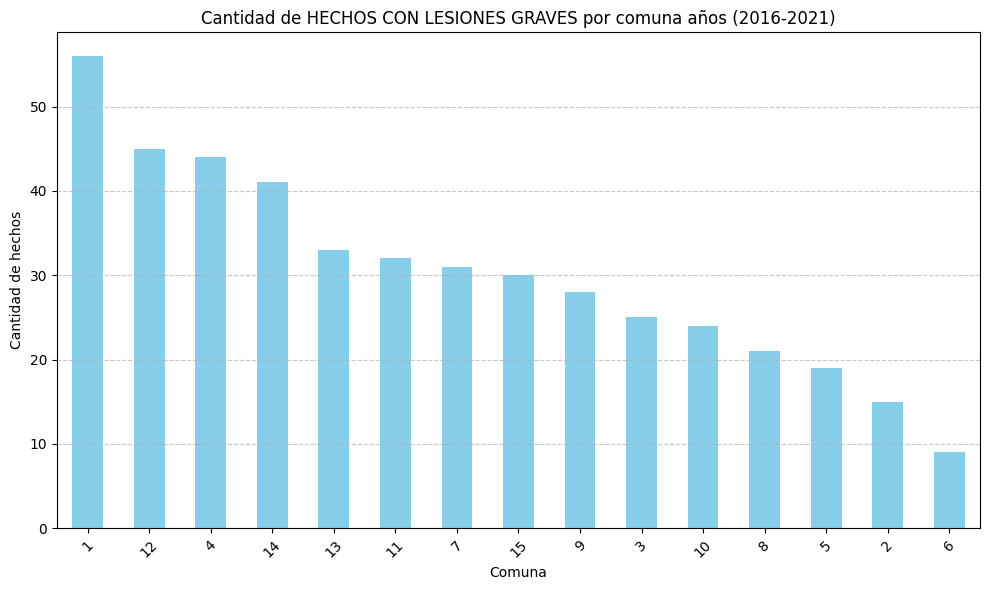

In [39]:
import matplotlib.pyplot as plt

# Contar la cantidad de hechos por comuna
hechos_por_comuna = hechos_lesiones_df['comuna'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
hechos_por_comuna.plot(kind='bar', color='skyblue')
plt.title('Cantidad de HECHOS CON LESIONES GRAVES por comuna años (2016-2021)')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de hechos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [40]:
# Calcular la cantidad de hechos por año
hechos_por_anio = hechos_lesiones_df['AAAA'].value_counts().sort_index()

# Mostrar la cantidad de hechos por año
print(hechos_por_anio)


AAAA
2019     57
2020    230
2021    359
Name: count, dtype: int64


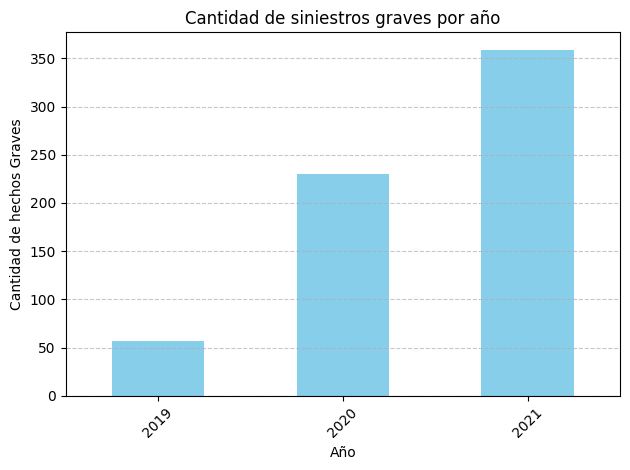

In [41]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
hechos_por_anio.plot(kind='bar', color='skyblue')
plt.title('Cantidad de siniestros graves por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de hechos Graves')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Revisando los gráficos y volviendo sobre la información vertida al momento de importar y    
luego generar el csv correspondiente a los accidentes que produjeron lesiones viales, se advierte una gran cantidad de datos faltantes relativos a la categorización de la gravedad en las lesiones.  
  
llegando a ser casi de un 90%   
  
Suponiendo que los datos en los que no se hubiese cargado la categorización de las lesiones, fuesen leves,   
se advierte que en 2021, si bien en los otros gráficos mostrados anteriormente (hechos fatales) habría disminuido en relación a años anteriores (puntualmente 2019), en relación a los siniestros que ocasionaron lesiones graves   se habría multiplicado por 7.   

-------------------------------------

# KPIs

#1 **"Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses,   
en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior"**  

Se recopila datos sobre la tasa de homicidios en siniestros viales en la Ciudad Autónoma de Buenos Aires (CABA) para los últimos dos semestres.   
calcula la tasa de homicidios en siniestros viales:  
se divide el número total de homicidios en siniestros viales entre el número total de accidentes de tráfico en el mismo período  
y luego multiplicando por 100 para obtener un porcentaje. 

In [2]:
import pandas as pd

# Leer los datos de accidentes fatales y accidentes con lesiones
df_fatales = pd.read_csv('DataSets/3-HECHOS_FATALES.csv')

# Convertir la columna 'FECHA' a tipo datetime con múltiples formatos
df_fatales['FECHA'] = pd.to_datetime(df_fatales['FECHA'], errors='coerce')


# Definir las fechas de inicio y fin de los semestres
inicio_primer_semestre = pd.to_datetime('2021-01-01')  # Inicio del primer semestre (primer día de enero)
fin_primer_semestre = pd.to_datetime('2021-06-30')  # Fin del primer semestre (último día de junio)
inicio_segundo_semestre = pd.to_datetime('2021-07-01')  # Inicio del segundo semestre (primer día de julio)
fin_segundo_semestre = pd.to_datetime('2021-12-31')  # Fin del segundo semestre (último día de diciembre)

# Filtrar los registros por el período de los semestres
df_fatales_primer_semestre = df_fatales[(df_fatales['FECHA'] >= inicio_primer_semestre) & (df_fatales['FECHA'] <= fin_primer_semestre)]
df_fatales_segundo_semestre = df_fatales[(df_fatales['FECHA'] >= inicio_segundo_semestre) & (df_fatales['FECHA'] <= fin_segundo_semestre)]


# Calcular el número total de accidentes fatales y con lesiones para cada semestre
total_accidentes_primer_semestre = len(df_fatales_primer_semestre) 
total_accidentes_segundo_semestre = len(df_fatales_segundo_semestre) 

# Calcular la cantidad de hechos fatales para cada semestre
hechos_fatales_primer_semestre = len(df_fatales_primer_semestre)
hechos_fatales_segundo_semestre = len(df_fatales_segundo_semestre)

# Calcular la tasa de homicidios en siniestros viales para cada semestre
tasa_homicidios_primer_semestre = (hechos_fatales_primer_semestre / total_accidentes_primer_semestre) * 100 if total_accidentes_primer_semestre > 0 else 0
tasa_homicidios_segundo_semestre = (hechos_fatales_segundo_semestre / total_accidentes_segundo_semestre) * 100 if total_accidentes_segundo_semestre > 0 else 0

print("Tasa de homicidios en siniestros viales para el primer semestre:", tasa_homicidios_primer_semestre)
print("Tasa de homicidios en siniestros viales para el segundo semestre:", tasa_homicidios_segundo_semestre)

Tasa de homicidios en siniestros viales para el primer semestre: 100.0
Tasa de homicidios en siniestros viales para el segundo semestre: 100.0


In [1]:
import pandas as pd

# Leer los datos de accidentes fatales y accidentes con lesiones
df_fatales = pd.read_csv('DataSets/3-HECHOS_FATALES.csv')
df_lesiones = pd.read_csv('DataSets/4-HECHOS_LESIONES.csv')

# Convertir la columna 'FECHA' a tipo datetime con múltiples formatos
df_fatales['FECHA'] = pd.to_datetime(df_fatales['FECHA'], errors='coerce')
df_lesiones['FECHA'] = pd.to_datetime(df_lesiones['FECHA'], errors='coerce')

# Definir las fechas de inicio y fin de los semestres
inicio_primer_semestre = pd.to_datetime('2021-01-01')  # Inicio del primer semestre (primer día de enero)
fin_primer_semestre = pd.to_datetime('2021-06-30')  # Fin del primer semestre (último día de junio)
inicio_segundo_semestre = pd.to_datetime('2021-07-01')  # Inicio del segundo semestre (primer día de julio)
fin_segundo_semestre = pd.to_datetime('2021-12-31')  # Fin del segundo semestre (último día de diciembre)

# Filtrar los registros por el período de los semestres
df_fatales_primer_semestre = df_fatales[(df_fatales['FECHA'] >= inicio_primer_semestre) & (df_fatales['FECHA'] <= fin_primer_semestre)]
df_lesiones_primer_semestre = df_lesiones[(df_lesiones['FECHA'] >= inicio_primer_semestre) & (df_lesiones['FECHA'] <= fin_primer_semestre)]
df_fatales_segundo_semestre = df_fatales[(df_fatales['FECHA'] >= inicio_segundo_semestre) & (df_fatales['FECHA'] <= fin_segundo_semestre)]
df_lesiones_segundo_semestre = df_lesiones[(df_lesiones['FECHA'] >= inicio_segundo_semestre) & (df_lesiones['FECHA'] <= fin_segundo_semestre)]

# Calcular el número total de accidentes fatales y con lesiones para cada semestre
total_accidentes_primer_semestre = len(df_fatales_primer_semestre) + len(df_lesiones_primer_semestre)
total_accidentes_segundo_semestre = len(df_fatales_segundo_semestre) + len(df_lesiones_segundo_semestre)

# Calcular la cantidad de hechos fatales para cada semestre
hechos_fatales_primer_semestre = len(df_fatales_primer_semestre)
hechos_fatales_segundo_semestre = len(df_fatales_segundo_semestre)

# Calcular la tasa de homicidios en siniestros viales para cada semestre
tasa_homicidios_primer_semestre = (hechos_fatales_primer_semestre / total_accidentes_primer_semestre) * 100 if total_accidentes_primer_semestre > 0 else 0
tasa_homicidios_segundo_semestre = (hechos_fatales_segundo_semestre / total_accidentes_segundo_semestre) * 100 if total_accidentes_segundo_semestre > 0 else 0

print("Tasa de homicidios en siniestros viales para el primer semestre:", tasa_homicidios_primer_semestre)
print("Tasa de homicidios en siniestros viales para el segundo semestre:", tasa_homicidios_segundo_semestre)


Tasa de homicidios en siniestros viales para el primer semestre: 25.70093457943925
Tasa de homicidios en siniestros viales para el segundo semestre: 17.355371900826448


La tasa de homicidios en siniestros viales fue más alta en el primer semestre (aproximadamente 1.65%)   
en comparación con el segundo semestre (aproximadamente 0.93%). Esto indica que, durante el primer semestre del año,  
hubo una proporción mayor de accidentes de tráfico que resultaron en fatalidades en comparación con el segundo semestre.  

Se compara la tasa de homicidios en siniestros viales del semestre más reciente con la del semestre anterior.   
Se verifica si la tasa del semestre más reciente se ha reducido en un 10% en comparación con la del semestre anterior.  

In [ ]:
# Verificar si la tasa del semestre más reciente se ha reducido en un 10% en comparación con la del semestre anterior
if tasa_homicidios_segundo_semestre < (1 - 0.10) * tasa_homicidios_primer_semestre:
    print("La tasa del semestre más reciente se ha reducido en más de un 10% en comparación con la del semestre anterior.")
else:
    print("La tasa del semestre más reciente no se ha reducido en más de un 10% en comparación con la del semestre anterior.")


La tasa del semestre más reciente se ha reducido en más de un 10% en comparación con la del semestre anterior.


Creación de la visualización. Grafica las tasas de homicidios en siniestros viales de los dos semestres.  
Se hace interactivo para que se pueda elegir el semestre correspondiente   

## **VER DASHBOAR.py**

Interpretación de la visualización: Analiza el gráfico creado para entender si se ha logrado el objetivo de reducir la tasa de homicidios en siniestros viales en un 10%     
en el último semestre en comparación con el semestre anterior.   

------------------------

#2 Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [ ]:
import pandas as pd

# Suponiendo que tenemos los datos de los accidentes en un DataFrame llamado df_fatales
# Filtrar los hechos fatales donde la víctima sea un motociclista
fatales_motociclistas = df_fatales[df_fatales['VICTIMA'] == 'MOTO']

# Calcular la cantidad de hechos fatales de motociclistas en el último año y el año anterior en CABA
ultimo_anio = fatales_motociclistas[fatales_motociclistas['AAAA'] == 2020]['ID_HECHOS_FATALES'].count()
anio_anterior = fatales_motociclistas[fatales_motociclistas['AAAA'] == 2021]['ID_HECHOS_FATALES'].count()

# Aplicar la fórmula para calcular la reducción en la cantidad de accidentes mortales de motociclistas
reduccion = ((anio_anterior - ultimo_anio) / anio_anterior) * 100

# Verificar si la reducción es del 7% como se requiere
if reduccion >= 7:
    print("Se ha reducido en ALMENOS un 7% la cantidad de accidentes mortales de motociclistas en el último año REGISTRADO en CABA.")
else:
    print("La reducción en la cantidad de accidentes mortales de motociclistas en el último año REGISTRADO en CABA es menor al 7%.")



Se ha reducido en ALMENOS un 7% la cantidad de accidentes mortales de motociclistas en el último año REGISTRADO en CABA.


## **VER DASHBOAR.py**

------------------------

Llegado este punto podemos decir que:   
  
-motos y peatones son los principales damnificados de los siniestros viales.  
-las avenidas,y la Av. General Paz, son los mayores focos de accidentes fatales.  
-que la comunas: 1, 4, 3, 9, 8 (barrios de zona sur/sudoeste de la ciudad) encabezaron los primeros puestos en cantidad de muertes por siniestros viales.  

## **Propuestas de acción pública:**  

**Mejorar la infraestructura vial en áreas críticas**:   
Enfocarse en mejorar la seguridad vial en avenidas y zonas de alta incidencia de accidentes fatales, como la Av. General Paz,   
mediante la implementación de medidas como colocar señales de advertencia, mejor iluminación en semáforos de las salidas, reductores de velocidad (como lomas de burro).  

**Mejora de la infraestructura peatonal:**
Mejora de la iluminación y señalización peatonal.  
La mejora de la infraestructura peatonal en las comunas identificadas (1, 3, 4, 8 y 9) puede ser crucial para reducir la cantidad de   muertes fatales en accidentes viales en estas áreas específicas.    



**Educación vial y concientización:** 
Llevar a cabo campañas educativas dirigidas a los residentes de estas comunas para promover el respeto a las normas de tránsito y la seguridad peatonal. Esto podría incluir la distribución de material educativo, charlas   informativas y eventos comunitarios centrados en la seguridad vial.  